### Importing Libraries and setting up Plots

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette = "bright", font_scale=1.3)
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

### Reading the Json table into a DataFrame for further analysis

In [2]:
Table = pd.DataFrame( [
{"app": "A", "bid_price": 0.01, "win": 0, "events": 100000}, 
{"app": "A", "bid_price": 0.01, "win": 1, "events": 0}, 
{"app": "A", "bid_price": 0.1, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.1, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 0.2, "win": 0, "events": 8000000}, 
{"app": "A", "bid_price": 0.2, "win": 1, "events": 2000000}, 
{"app": "A", "bid_price": 0.4, "win": 0, "events": 700000}, 
{"app": "A", "bid_price": 0.4, "win": 1, "events": 300000}, 
{"app": "A", "bid_price": 0.5, "win": 0, "events": 80000}, 
{"app": "A", "bid_price": 0.5, "win": 1, "events": 20000}, 
{"app": "A", "bid_price": 0.75, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.75, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 1, "win": 0, "events": 400}, 
{"app": "A", "bid_price": 1, "win": 1, "events": 600}, 
{"app": "A", "bid_price": 2, "win": 0, "events": 30}, 
{"app": "A", "bid_price": 2, "win": 1, "events": 70}, 
{"app": "A", "bid_price": 5, "win": 0, "events": 2}, 
{"app": "A", "bid_price": 5, "win": 1, "events": 8}, 
{"app": "A", "bid_price": 9, "win": 0, "events": 0}, 
{"app": "A", "bid_price": 9, "win": 1, "events": 1}
] )

### Basic Exploratory Data Analysis on the table

In [3]:
Table

,app,bid_price,win,events
0,A,0.01,0,100000
1,A,0.01,1,0
2,A,0.10,0,7000
3,A,0.10,1,3000
4,A,0.20,0,8000000
5,A,0.20,1,2000000
6,A,0.40,0,700000
7,A,0.40,1,300000
8,A,0.50,0,80000
9,A,0.50,1,20000


In [4]:
Table.describe()

,bid_price,win,events
count,20.000000,20.000000,2.000000e+01
mean,1.896000,0.500000,5.610556e+05
std,2.829812,0.512989,1.810805e+06
min,0.010000,0.000000,0.000000e+00
25%,0.200000,0.000000,2.450000e+01
50%,0.625000,0.500000,3.000000e+03
75%,2.000000,1.000000,8.500000e+04
max,9.000000,1.000000,8.000000e+06


In [5]:
Table.shape

(20, 4)

In [6]:
Table.info()
#to check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   app        20 non-null     object 
 1   bid_price  20 non-null     float64
 2   win        20 non-null     int64  
 3   events     20 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 768.0+ bytes


# Solution to Problem 1
### Function to calculate winrate

- to_numpy is used to take the numerical values
- formula is [total events in case of win(=1) / total events in case of win(=1) and loss(=0)]

In [7]:
def winrate(Table):
    return Table[Table.win == 1]["events"].to_numpy() / ( Table[Table.win == 1]["events"].to_numpy()  + Table[Table.win == 0]["events"].to_numpy() )



### Using lambda and groupby to get the winrate of each win bid

In [8]:
Winrate_Table = Table.groupby(["app","bid_price"]).apply( lambda x : winrate( x )[0] )

In [9]:
Winrate_Table

app  bid_price
A    0.01         0.0
     0.10         0.3
     0.20         0.2
     0.40         0.3
     0.50         0.2
     0.75         0.3
     1.00         0.6
     2.00         0.7
     5.00         0.8
     9.00         1.0
dtype: float64

### Resetting Index 

In [10]:
Winrate_Table = pd.DataFrame(Winrate_Table).reset_index()

In [11]:
Winrate_Table

,app,bid_price,0
0,A,0.01,0.0
1,A,0.10,0.3
2,A,0.20,0.2
3,A,0.40,0.3
4,A,0.50,0.2
5,A,0.75,0.3
6,A,1.00,0.6
7,A,2.00,0.7
8,A,5.00,0.8
9,A,9.00,1.0


### Renaming the new column of winrate

In [12]:
Winrate_Table = Winrate_Table.rename({0:"winrate"}, axis = 1)

In [13]:
Winrate_Table

,app,bid_price,winrate
0,A,0.01,0.0
1,A,0.10,0.3
2,A,0.20,0.2
3,A,0.40,0.3
4,A,0.50,0.2
5,A,0.75,0.3
6,A,1.00,0.6
7,A,2.00,0.7
8,A,5.00,0.8
9,A,9.00,1.0


### Calculating total events and adding to table

In [14]:
Winrate_Table["total_events"] = Table.groupby("bid_price").sum()["events"].values

In [15]:
Winrate_Table

,app,bid_price,winrate,total_events
0,A,0.01,0.0,100000
1,A,0.10,0.3,10000
2,A,0.20,0.2,10000000
3,A,0.40,0.3,1000000
4,A,0.50,0.2,100000
5,A,0.75,0.3,10000
6,A,1.00,0.6,1000
7,A,2.00,0.7,100
8,A,5.00,0.8,10
9,A,9.00,1.0,1


### Plotting using scatterplot the bid price vs winrate
- we use np.log to help  visualise total events
- the blue ball size shows the relative sizes of total events to each other
- using xticks to show every point of total events to bid price

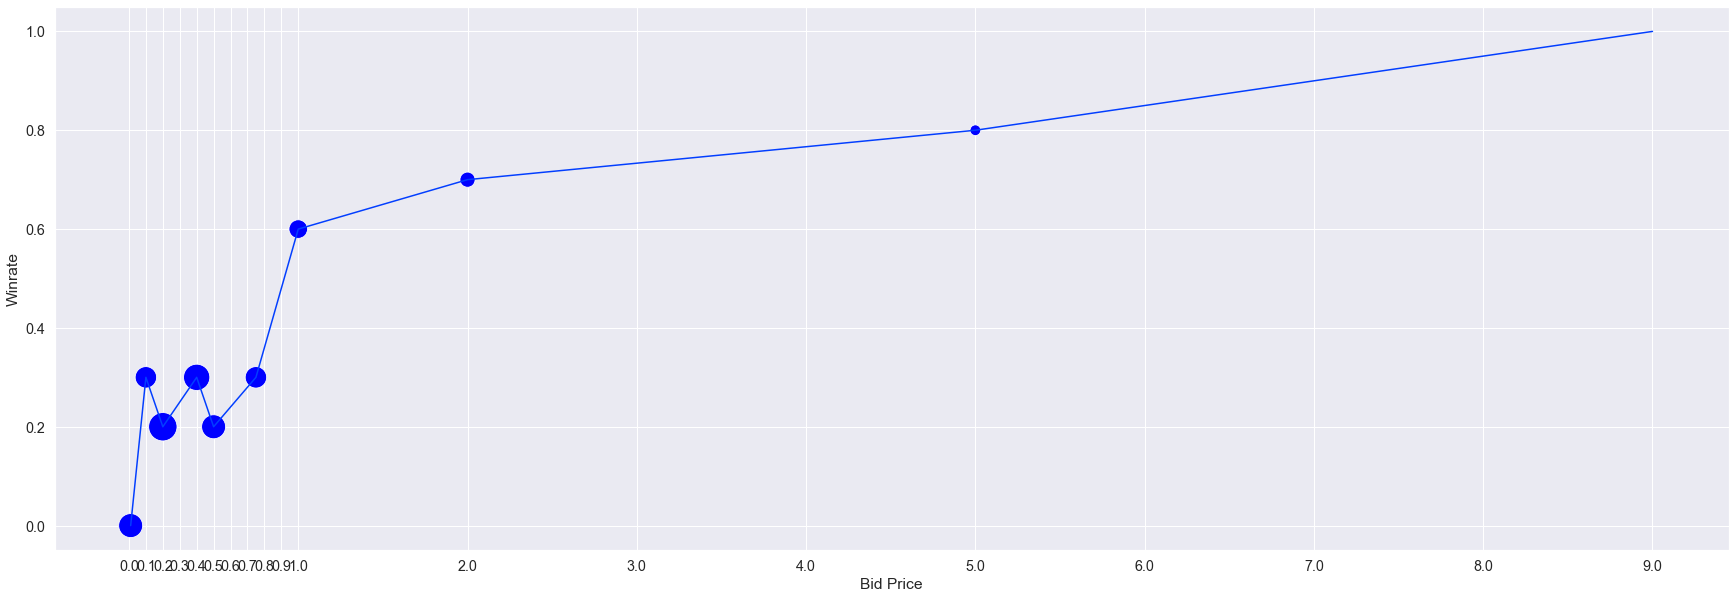

In [16]:
plt.figure(figsize = (30,10))
plt.plot( Winrate_Table.bid_price, Winrate_Table.winrate)
sns.scatterplot( Winrate_Table.bid_price,Winrate_Table.winrate, s = np.log(Winrate_Table['total_events'])*50, color = 'blue')
plt.xlabel("Bid Price")
plt.ylabel("Winrate");
plt.xticks(np.append(np.arange(0,1,0.1),  np.arange(1,10)));

# Solution to Problem 2
### Calculating net income revenue from win and events
- Assuming net revenue from each win is 0.01 minimum(least possible amount for minimum profit)

In [17]:
Table['net income revenue'] = 0.01* Table.win * Table.events

In [18]:
Table

,app,bid_price,win,events,net income revenue
0,A,0.01,0,100000,0.00
1,A,0.01,1,0,0.00
2,A,0.10,0,7000,0.00
3,A,0.10,1,3000,30.00
4,A,0.20,0,8000000,0.00
5,A,0.20,1,2000000,20000.00
6,A,0.40,0,700000,0.00
7,A,0.40,1,300000,3000.00
8,A,0.50,0,80000,0.00
9,A,0.50,1,20000,200.00


### Finding the max event case

In [19]:
Table.iloc[Table['net income revenue'].idxmax()]

app                         A
bid_price                 0.2
win                         1
events                2000000
net income revenue    20000.0
Name: 5, dtype: object

###  Finding the max total event to calculate total wins

In [22]:
Winrate_Table.sort_values("total_events", ascending = False)

,app,bid_price,winrate,total_events
2,A,0.20,0.2,10000000
3,A,0.40,0.3,1000000
0,A,0.01,0.0,100000
4,A,0.50,0.2,100000
1,A,0.10,0.3,10000
5,A,0.75,0.3,10000
6,A,1.00,0.6,1000
7,A,2.00,0.7,100
8,A,5.00,0.8,10
9,A,9.00,1.0,1


In [23]:
#total win(max) = total events(max)*winrate
total_win = 10000000*0.2
total_win

2000000.0

### Finding most optimal bid valuation(mobv) using net revenue from one event and total wins

### the most optimal bid valuation we should send in our response is 0.2